In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def tanh(X):
    return (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))

In [118]:
X1=np.random.randn(500,2)*[1,2]+[0,0]
X2=np.random.randn(500,2)*[2,3]+[3,3]
X1=np.hstack((X1,np.ones((500,1))))
X2=np.hstack((X2,np.zeros((500,1))))

In [119]:
X=np.vstack((X1,X2))
np.random.shuffle(X)

In [120]:
y=X[:,-1:]
X=X[:,:-1]

In [ ]:

def get_one_hot(targets):
    #Need the matrix column as a row np array for the following
    targets=np.asarray(targets).reshape(-1)
    #Total number of categories in column
    num_classes=len(np.unique(targets))
    #Create an arry the same length as the column, with the entries correspond to where
    #they appear in the np.unique output, which sorts them.
    indices=np.searchsorted(np.unique(targets),targets)
    #For each index, take the corresponding column out of the identity matrix of size=number of catgories. 
    #So the third entry of the uniques array will make this return [0,0,1,0]. Does so for every index in the indices list
    res = np.eye(num_classes)[indices]
    #return as a column vector
    return res.reshape(len(targets),num_classes)

In [121]:
def norm(X,X_tr):
    X_tr_min=X_tr.min(0)
    X_tr_max=X_tr.max(0)
    X=(X-X_tr_min)/(X_tr_max-X_tr_min)
    return(X)

In [122]:
X=norm(X,X)

In [123]:
colors=["red","blue"]

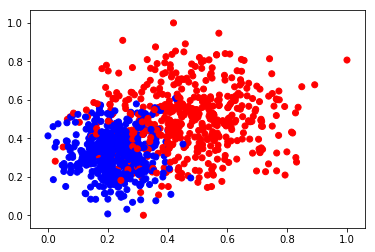

In [124]:
plt.scatter(X[:,0],X[:,1], color=np.array(colors)[y.reshape(-1).astype(int)])

In [125]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [126]:
w1=np.random.randn(2,6)
w2=np.random.randn(6,1)
b1=np.random.randn(1,6)
b2=np.random.randn(1,1)

In [127]:
def cost(y,p):
    Err=[]
    for j in range(y.shape[1]):
        if y[j]==1:
            Err.append(-np.log(p[j]))
        else:
            Err.append(-np.log(1-p[j]))
    return np.sum(Err)

In [141]:
epochs=200
w1=np.random.randn(2,6)
w2=np.random.randn(6,1)
b1=np.random.randn(1,6)
b2=np.random.randn(1,1)
eta=0.0001
Error=[]
epoch=[]
for i in range(epochs):
    p=sigmoid(tanh(X@w1+b1)@w2+b2)
    Error.append(cost(y,p))
    epoch.append(i)
    w1=w1-eta*X.T@(np.multiply((p-y)@w2.T,1-np.power(tanh(X@w1+b1),2)))
    b1=b1-eta*np.sum(np.multiply((p-y)@w2.T,1-np.power(tanh(X@w1+b1),2)))
    w2=w2-eta*tanh(X@w1+b1).T@(p-y)
    b2=b2-eta*np.sum(p-y)
    
    

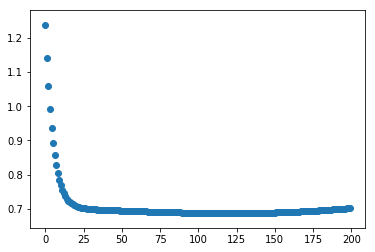

In [142]:
plt.scatter(epoch,Error)

In [143]:
Error[-1]

0.7022203032307213

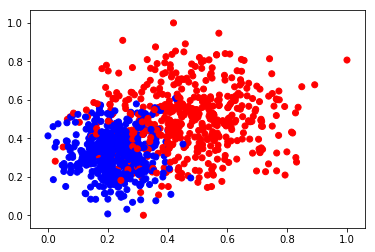

In [145]:
plt.scatter(X[:,0],X[:,1], color=np.array(colors)[y.reshape(-1).astype(int)])

In [146]:
xs=(np.random.rand(10000000,2))

In [147]:
boundary=xs[np.where(abs(tanh(xs@w1+b1)@w2+b2)<.01)[0],:]

In [148]:
boundary.shape

(39019, 2)

(-0.1, 1.2)

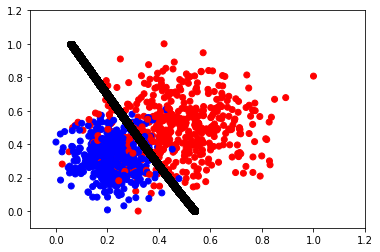

In [149]:
plt.scatter(X[:,0],X[:,1], color=np.array(colors)[y.reshape(-1).astype(int)])
plt.scatter(boundary[:,0],boundary[:,1], color="black")
plt.ylim(-0.1, 1.2)
plt.xlim(-0.1,1.2)

In [152]:
data=np.random.randn(15000,2)
data2=(25./100.)*np.random.randn(45000,2)
circle=np.matrix([[x[0],x[1]] for x in data if (np.sqrt(x[0]**2+x[1]**2)>1.50)])
circle2=np.matrix(data2)
data2=np.hstack((circle2,np.zeros((circle2.shape[0],1))))
data=np.hstack((circle,np.ones((circle.shape[0],1))))
X=np.vstack((data,data2))
y=X[:,-1:]
X=X[:,:-1]

In [156]:
X.shape

(49753, 2)

In [164]:
X=norm(X,X)

In [165]:
y.shape

(49753, 1)

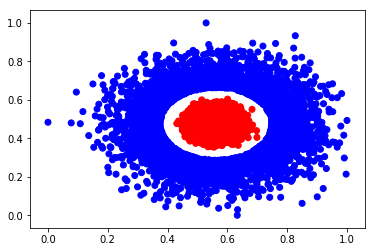

In [166]:
plt.scatter([X[:,0]],[X[:,1]], color=np.array(colors)[np.array(y).reshape(-1).astype(int)])

In [201]:
epochs=2000
# w1=np.random.randn(2,6)
# w2=np.random.randn(6,1)
# b1=np.random.randn(1,6)
# b2=np.random.randn(1,1)
eta=0.00001
Error=[]
epoch=[]
for i in range(epochs):
    p=sigmoid(tanh(X@w1+b1)@w2+b2)
    Error.append(cost(y,p))
    epoch.append(i)
    w1=w1-eta*X.T@(np.multiply((p-y)@w2.T,1-np.power(tanh(X@w1+b1),2)))
    b1=b1-eta*np.sum(np.multiply((p-y)@w2.T,1-np.power(tanh(X@w1+b1),2)))
    w2=w2-eta*tanh(X@w1+b1).T@(p-y)
    b2=b2-eta*np.sum(p-y)
    

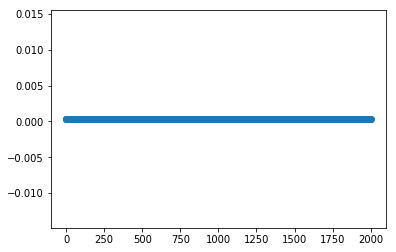

In [202]:
plt.scatter(epoch,Error)

In [203]:
xs=(.8*np.random.rand(10000000,2))

boundary=xs[np.where(abs(tanh(xs@w1+b1)@w2+b2)<.1)[0],:]

boundary.shape

(78637, 2)

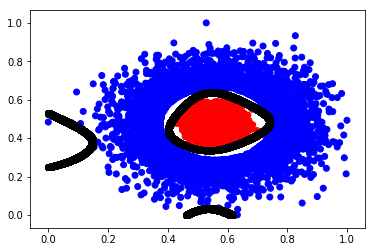

In [204]:
plt.scatter([X[:,0]],[X[:,1]], color=np.array(colors)[np.array(y).reshape(-1).astype(int)])
plt.scatter(boundary[:,0],boundary[:,1], color="black")

In [206]:
Error

[0.00032275626250067403,
 0.0003227656014184753,
 0.00032277493911583475,
 0.0003227842755907534,
 0.000322793610841121,
 0.0003228029448653828,
 0.00032281227766120643,
 0.00032282160922681504,
 0.0003228309395603205,
 0.0003228402686598349,
 0.00032284959652324806,
 0.000322858923148894,
 0.00032286824853455164,
 0.000322877572678666,
 0.00032288689557890497,
 0.0003228962172337136,
 0.0003229055376408707,
 0.00032291485679882144,
 0.00032292417470545566,
 0.0003229334913588854,
 0.0003229428067573336,
 0.00032295212089880127,
 0.00032296143378140037,
 0.00032297074540302067,
 0.00032298005576232954,
 0.0003229893648571057,
 0.0003229986726856834,
 0.0003230079792458412,
 0.0003230172845356912,
 0.00032302658855390073,
 0.00032303589129802643,
 0.00032304519276662443,
 0.0003230544929578068,
 0.00032306379186935227,
 0.0003230730894997061,
 0.0003230823858468691,
 0.00032309168090917536,
 0.00032310097468484796,
 0.00032311026717177677,
 0.00032311955836818477,
 0.000323128848272295,